## Linear Regression

(0.0, 6.0, 0.0, 20.0)

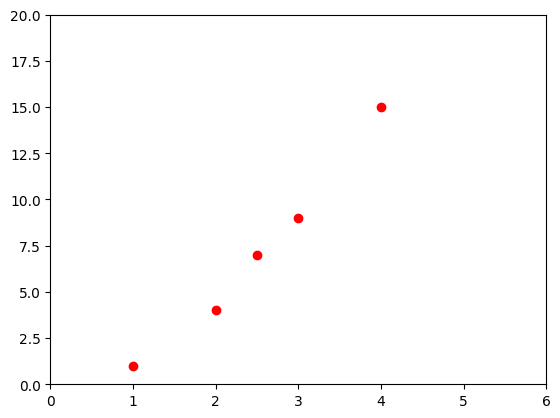

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

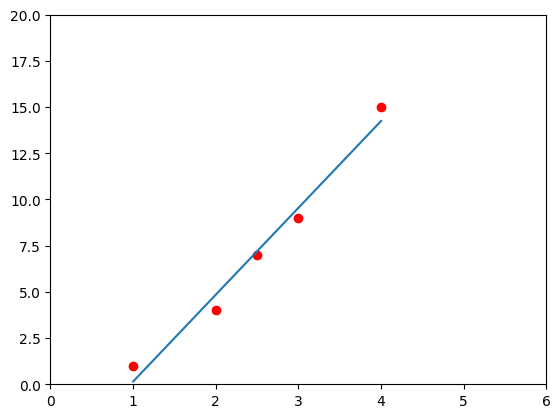

In [2]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [3]:
# Load dataset.
import pandas as pd
df_train = pd.read_csv("/Users/abhishek/Codes/Resources/Data/train.csv") # training data
df_test = pd.read_csv("/Users/abhishek/Codes/Resources/Data/eval.csv") # testing data


In [4]:
df_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()
for col in ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']:
    df_train[col] = encoder.fit_transform(df_train[col])

In [6]:
df_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22.0,1,0,7.2500,2,7,2,0
1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,0,26.0,0,0,7.9250,2,7,2,1
3,1,0,35.0,1,0,53.1000,0,2,2,0
4,0,1,28.0,0,0,8.4583,2,7,1,1


In [7]:
y = df_train.pop('survived')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_train,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X_train)
x_test_scaled = scalar.transform(X_test)

### ANN

In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

/Users/abhishek/Codes/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [13]:
import time
tic = time.time()
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
print(":::::")
print(time.time()-tic)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9984 - val_loss: 1.0322
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7536 - val_loss: 0.2904
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3295 - val_loss: 0.1932
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2369 - val_loss: 0.2081
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2172 - val_loss: 0.2210
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2506 - val_loss: 0.2087
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1822 - val_loss: 0.1924
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2013 - val_loss: 0.2252
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2100 - val_loss: 0.1798
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1801 - val_loss: 0.1858
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2070 - val_loss: 0.3213
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4

In [14]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1576
Test Loss (MSE): 0.16532206535339355


In [15]:
predictions = model.predict(X_test)
print("Predictions:", predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Predictions: [[ 0.41229087]
 [ 0.11695165]
 [ 0.06750507]
 [ 0.09235949]
 [-0.3517192 ]
 [-0.2403329 ]
 [ 0.7465214 ]
 [ 0.03987999]
 [ 0.15681678]
 [ 0.7054145 ]
 [ 0.11028261]
 [ 0.6239764 ]
 [ 0.05854458]
 [ 0.0812344 ]
 [ 0.07379622]
 [ 0.65531725]
 [ 0.6405377 ]
 [ 0.39951342]
 [ 0.6853468 ]
 [ 0.10239644]
 [ 0.0417325 ]
 [-0.2403329 ]
 [ 0.42606896]
 [ 0.06750507]
 [ 0.54364055]
 [ 0.12250835]
 [ 1.0004585 ]
 [ 0.2544405 ]
 [ 0.0833704 ]
 [ 0.7188098 ]
 [ 0.08596487]
 [ 0.98816794]
 [ 0.63391656]
 [ 0.6436662 ]
 [ 0.3332464 ]
 [ 0.39335984]
 [ 0.68057483]
 [ 0.11028261]
 [ 1.5219276 ]
 [ 0.5985958 ]
 [ 0.19052094]
 [ 0.11137659]
 [ 0.72674054]
 [ 0.11695165]
 [ 0.11199517]
 [ 0.15616709]
 [ 0.10571093]
 [ 0.8591172 ]
 [ 0.6456439 ]
 [ 0.03245945]
 [ 0.718615  ]
 [ 0.41333884]
 [ 0.31776732]
 [ 0.24278611]
 [ 0.5940718 ]
 [ 0.09321875]
 [ 1.035869  ]
 [ 0.04198331]
 [ 1.2371099 ]
 [ 0.6762866 ]
 [ 0.09610958]
 [ 0.13574558]
 [ 0.10281009]
 [ 0